In [1]:
print('Sentiment Analysis')

Sentiment Analysis


In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_names
beets,People often describe beetroot as a superfood ...,Beetroot
broccoli,Broccoli has a reputation as a superfood. It i...,Brassica oleracea var. italica
cabbage,"Cabbage, which is often lumped into the same c...",Brassica oleracea var. capitata
carrots,We include products we think are useful for ou...,Daucus carota subsp. sativus
cauliflower,Cauliflower is a cruciferous vegetable that is...,Brassica oleracea var. botrytis
garlic,"Garlic (Allium sativum), is used widely as a f...",Allium sativum
kale,We include products we think are useful for ou...,Kale
onions,We include products we think are useful for ou...,Allium cepa
peas,A recent review and meta-analysis focus on the...,Pisum sativum
seaweed,Seaweed grows in or near salty waters. There a...,Seaweed


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each vegetables
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_names,polarity,subjectivity
beets,People often describe beetroot as a superfood ...,Beetroot,0.136863,0.477575
broccoli,Broccoli has a reputation as a superfood. It i...,Brassica oleracea var. italica,0.091176,0.431289
cabbage,"Cabbage, which is often lumped into the same c...",Brassica oleracea var. capitata,0.148545,0.416935
carrots,We include products we think are useful for ou...,Daucus carota subsp. sativus,0.076316,0.428896
cauliflower,Cauliflower is a cruciferous vegetable that is...,Brassica oleracea var. botrytis,0.184764,0.502676
garlic,"Garlic (Allium sativum), is used widely as a f...",Allium sativum,0.098121,0.472986
kale,We include products we think are useful for ou...,Kale,0.116494,0.408436
onions,We include products we think are useful for ou...,Allium cepa,0.116492,0.456074
peas,A recent review and meta-analysis focus on the...,Pisum sativum,0.039132,0.447280
seaweed,Seaweed grows in or near salty waters. There a...,Seaweed,0.185491,0.503219


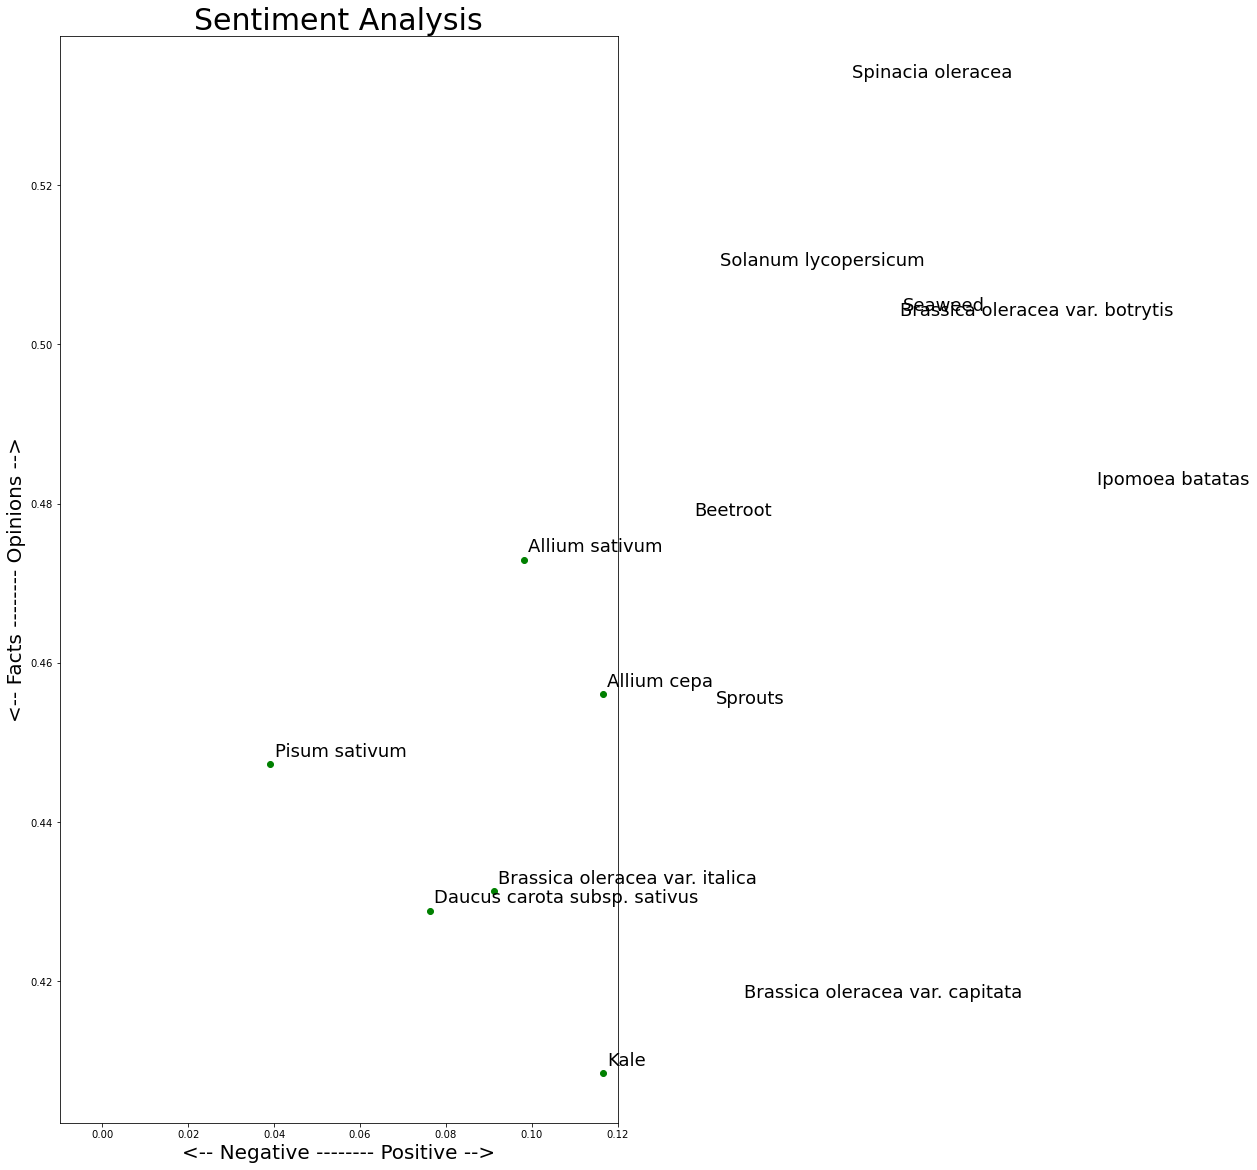

In [37]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 20]

for index, vegetable in enumerate(data.index):
    x = data.polarity.loc[vegetable]
    y = data.subjectivity.loc[vegetable]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, data['full_names'][index], fontsize=18)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=30)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)

plt.show()

In [5]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_names,polarity,subjectivity
beets,People often describe beetroot as a superfood ...,Beetroot,0.136863,0.477575
broccoli,Broccoli has a reputation as a superfood. It i...,Brassica oleracea var. italica,0.091176,0.431289
cabbage,"Cabbage, which is often lumped into the same c...",Brassica oleracea var. capitata,0.148545,0.416935
carrots,We include products we think are useful for ou...,Daucus carota subsp. sativus,0.076316,0.428896
cauliflower,Cauliflower is a cruciferous vegetable that is...,Brassica oleracea var. botrytis,0.184764,0.502676
garlic,"Garlic (Allium sativum), is used widely as a f...",Allium sativum,0.098121,0.472986
kale,We include products we think are useful for ou...,Kale,0.116494,0.408436
onions,We include products we think are useful for ou...,Allium cepa,0.116492,0.456074
peas,A recent review and meta-analysis focus on the...,Pisum sativum,0.039132,0.447280
seaweed,Seaweed grows in or near salty waters. There a...,Seaweed,0.185491,0.503219


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['People often describe beetroot as a superfood and have used it for centuries to treat fever, constipation, and skin complaints. Researchers are now investigating its effects on blood pressure. Is the plant useful for people with diabetes? Beets are one of several varieties of Beta vulgaris, grown for their edible root and leaves. Other cultivated varieties include the sugar beet, which has white flesh, and a leafy vegetable called chard. The vegetable is most often deep red. It is also possible to find golden, white, and striped versions of the vegetable. People have cultivated beets since the beginning of recorded history and often used it for medicinal purposes as well as for food. The Romans also ',
  'commonly used the vegetable as an aphrodisiac. Studies have shown that beets demonstrate a range of powerful effects that can help reduce the impact of diabetes. Research suggests that eating beets or drinking beet juice might benefit people with high blood pressure. High blood pre

In [8]:
# The list has 14 elements, one for each transcript
len(list_pieces)

14

In [40]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [41]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0975,
  0.08462962962962964,
  0.11095238095238096,
  0.16062500000000002,
  0.14071428571428574,
  0.1343939393939394,
  0.13843304843304843,
  0.14816849816849817,
  0.21547619047619043,
  0.12019702519702519],
 [0.21153846153846154,
  0.14892857142857144,
  0.17333333333333334,
  -0.1509259259259259,
  0.04631944444444445,
  0.2275,
  0.08386363636363636,
  0.0403125,
  0.004655067155067154,
  0.21805555555555556],
 [0.11515151515151513,
  0.2227777777777778,
  0.09615384615384616,
  0.13333333333333333,
  0.059375,
  0.0413030303030303,
  0.36481481481481487,
  0.01111580726965342,
  0.229945054945055,
  0.18032581453634083],
 [0.08863636363636364,
  0.20535087719298248,
  0.0341715976331361,
  0.11638888888888888,
  -0.002651515151515152,
  -0.037559523809523786,
  0.03288954635108481,
  0.20892857142857144,
  0.013532763532763534,
  0.038239538239538226],
 [0.20500000000000002,
  0.009615384615384609,
  0.2575,
  0.14499999999999996,
  0.03,
  0.17500000000000002,
  0.1025000

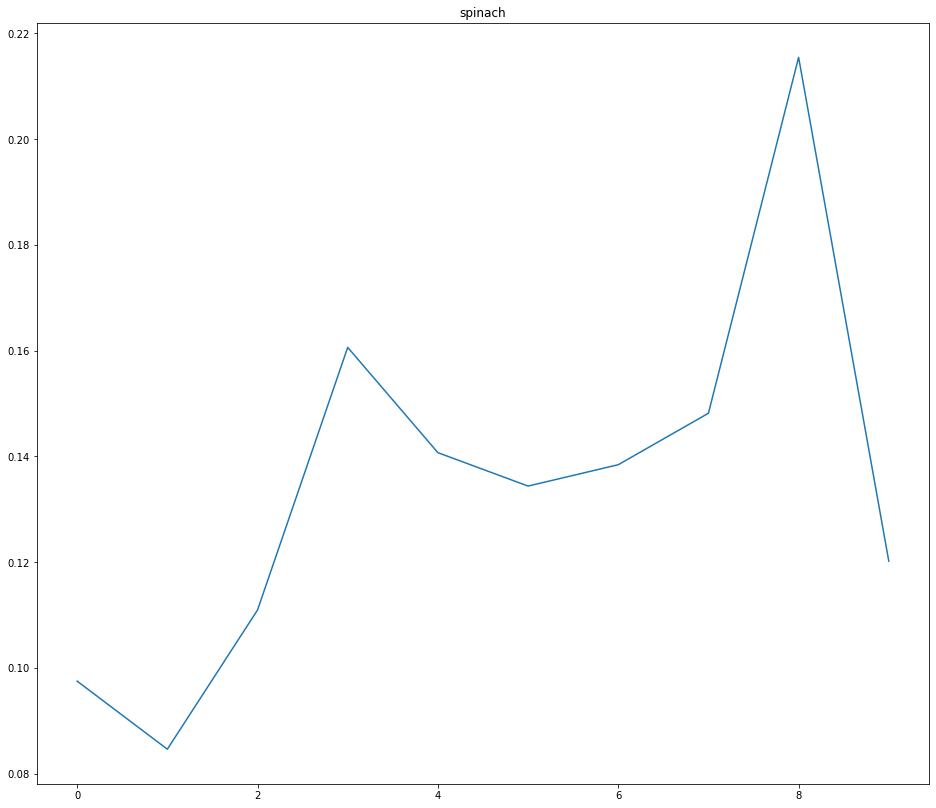

In [50]:
# Show the plot for one vegetable
plt.plot(polarity_transcript[0])
plt.title(data['full_names'].index[10])
plt.show()

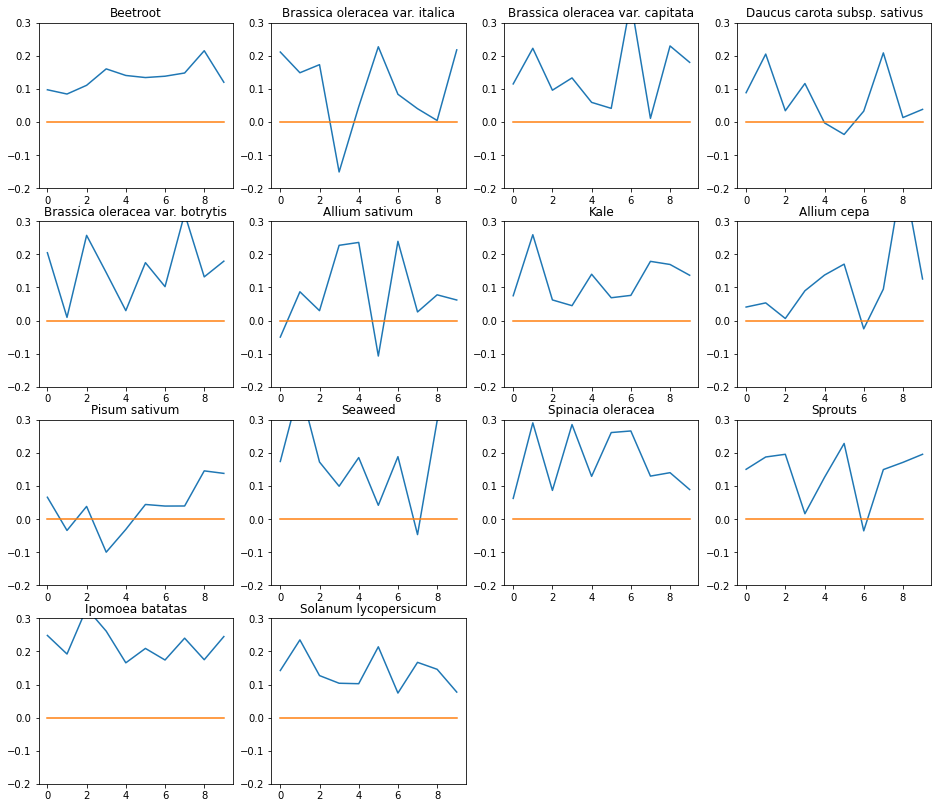

In [48]:
# Show the plot for all vegetables
plt.rcParams['figure.figsize'] = [16, 14]

for index, vegetable in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_names'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()